In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv(r'D:\MachineLearning\data\trip_duration_task.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          727135 non-null  float64
 2   pickup_datetime    729322 non-null  object 
 3   dropoff_datetime   729322 non-null  object 
 4   passenger_count    729322 non-null  int64  
 5   pickup_longitude   729322 non-null  float64
 6   pickup_latitude    727475 non-null  float64
 7   dropoff_longitude  729322 non-null  float64
 8   dropoff_latitude   729322 non-null  float64
 9   trip_duration      729322 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 55.6+ MB


In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,727135.000000,729322.000000,729322.000000,727475.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535377,1.662055,-73.973513,40.750917,-73.973422,40.751775,9.522291e+02
std,0.498747,1.312446,0.069754,0.033608,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737331,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754066,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768311,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# Обработка пустых занчений

In [7]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

vendor_id            0.299868
pickup_latitude      0.253249
pickup_datetime      0.000000
passenger_count      0.000000
dropoff_datetime     0.000000
pickup_longitude     0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
trip_duration        0.000000
dtype: float64

In [8]:
data['pickup_latitude'] = data['pickup_latitude'].fillna('-')
data['pickup_latitude'].value_counts()

pickup_latitude
-            1847
40.774101     201
40.774078     201
40.77412      197
40.774052     195
             ... 
40.666782       1
40.683846       1
40.808701       1
40.680038       1
40.834518       1
Name: count, Length: 39753, dtype: int64

In [9]:
mode_vendor_id = data['vendor_id'].mode()[0]
data['vendor_id'] = data['vendor_id'].fillna(mode_vendor_id)

In [10]:
data.isna().sum()/data.shape[0]*100

vendor_id            0.0
pickup_datetime      0.0
dropoff_datetime     0.0
passenger_count      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
trip_duration        0.0
dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vendor_id          729322 non-null  float64
 1   pickup_datetime    729322 non-null  object 
 2   dropoff_datetime   729322 non-null  object 
 3   passenger_count    729322 non-null  int64  
 4   pickup_longitude   729322 non-null  float64
 5   pickup_latitude    729322 non-null  object 
 6   dropoff_longitude  729322 non-null  float64
 7   dropoff_latitude   729322 non-null  float64
 8   trip_duration      729322 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 50.1+ MB


In [12]:
data['pickup_latitude'] = data['pickup_latitude'].replace({'-': '0'})
data['pickup_latitude'] = data['pickup_latitude'].astype(float)
print(data['pickup_latitude'].mean())
data['pickup_latitude'] = data['pickup_latitude'].replace({0: data['pickup_latitude'].mean()})
print(data['pickup_latitude'].mean())

40.64771559068568
40.750655486501266


In [13]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848


In [14]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [15]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848


In [16]:
data['vendor_id'] = data['vendor_id'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   vendor_id          729322 non-null  int64         
 1   pickup_datetime    729322 non-null  datetime64[ns]
 2   dropoff_datetime   729322 non-null  datetime64[ns]
 3   passenger_count    729322 non-null  int64         
 4   pickup_longitude   729322 non-null  float64       
 5   pickup_latitude    729322 non-null  float64       
 6   dropoff_longitude  729322 non-null  float64       
 7   dropoff_latitude   729322 non-null  float64       
 8   trip_duration      729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 50.1 MB


## Преобразование дат

In [18]:
data['trip_day'] = data['pickup_datetime'].dt.day_name()
data['trip_day'].value_counts()

trip_day
Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: count, dtype: int64

In [19]:
data['trip_month'] = data['pickup_datetime'].dt.month_name()
data['trip_month'].value_counts()

trip_month
March       128316
April       125634
May         124201
February    119364
June        117406
January     114401
Name: count, dtype: int64

In [20]:
data['trip_hour'] = data['pickup_datetime'].dt.hour
data['trip_hour'].value_counts()

trip_hour
18    45404
19    45262
20    42165
21    42045
22    40293
17    38313
14    37120
12    35820
15    35687
13    35630
23    35069
11    34061
9     33821
8     33612
10    32713
16    32147
7     27907
0     26726
1     19243
6     16552
2     13960
3     10424
4      7827
5      7521
Name: count, dtype: int64

## Добавим новый признак, показывающий расстояние между точками посадки и назначения

In [21]:
delta_x = data['dropoff_latitude'] - data['pickup_latitude']
delta_y = data['dropoff_longitude'] - data['pickup_longitude']
distance = (delta_x**2 + delta_y**2) ** (1/2)
data['distance'] = distance

In [22]:
data['vendor_id'].value_counts()

vendor_id
2    391478
1    337844
Name: count, dtype: int64

In [23]:
data.duplicated().sum()

np.int64(0)

In [24]:
data['trip_duration'] = data.pop('trip_duration')

In [25]:
data.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,Monday,February,16,0.012592,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,Friday,March,23,0.037371,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,Sunday,February,17,0.072712,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,Tuesday,January,9,0.021473,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,Wednesday,February,6,0.043264,848
5,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,Sunday,February,18,0.028081,1455
6,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,Wednesday,April,20,0.012824,397
7,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,Sunday,June,16,0.091880,1101
8,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,Monday,March,19,0.106855,1886
9,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,Sunday,April,22,0.055696,1429


In [26]:
data.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_hour,distance,trip_duration
count,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.536770,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128,1.662055,-73.973513,40.750655,-73.973422,40.751775,13.611698,0.035677,9.522291e+02
min,1.000000,2016-01-01 00:01:14,2016-01-01 00:05:54,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,0.000000,1.000000e+00
25%,1.000000,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000,1.000000,-73.991859,40.737156,-73.991318,40.735931,9.000000,0.012616,3.970000e+02
50%,2.000000,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000,1.000000,-73.981758,40.753956,-73.979759,40.754509,14.000000,0.021288,6.630000e+02
75%,2.000000,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000,2.000000,-73.967361,40.768269,-73.963036,40.769741,19.000000,0.038647,1.075000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,9.000000,-65.897385,51.881084,-65.897385,43.921028,23.000000,11.192603,1.939736e+06
std,0.498646,NaN,NaN,1.312446,0.069754,0.033964,0.069588,0.036037,6.402853,0.046387,3.864626e+03


# EDA

Обратим особое внимание на признаки:
- trip_duration
- trip_hour
- trip_day
- trip_month
- vendor_id

In [27]:
columns = ['trip_hour', 'vendor_id', 'distance', 'trip_duration']

In [28]:
data.describe()[columns]

,trip_hour,vendor_id,distance,trip_duration
count,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,13.611698,1.536770,0.035677,9.522291e+02
min,0.000000,1.000000,0.000000,1.000000e+00
25%,9.000000,1.000000,0.012616,3.970000e+02
50%,14.000000,2.000000,0.021288,6.630000e+02
75%,19.000000,2.000000,0.038647,1.075000e+03
max,23.000000,2.000000,11.192603,1.939736e+06
std,6.402853,0.498646,0.046387,3.864626e+03


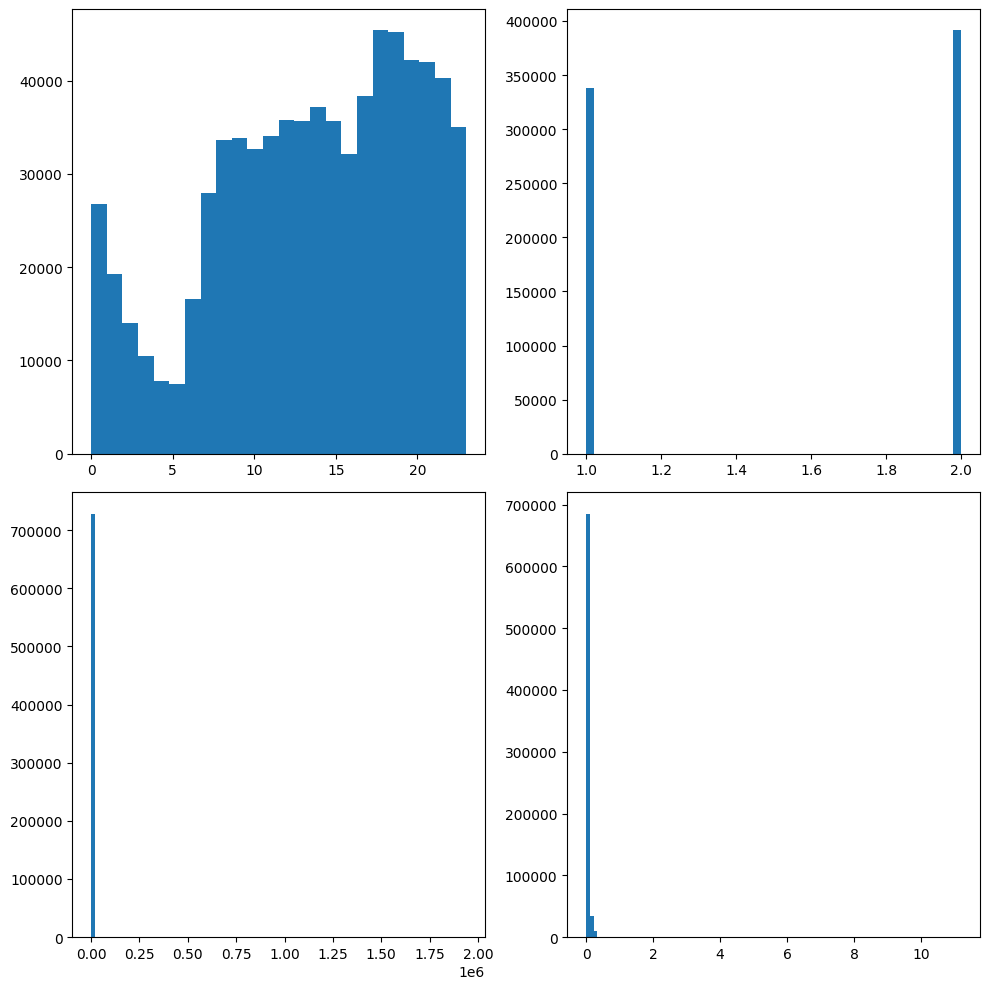

In [29]:
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(10, 10))

axs[0][0].hist(data['trip_hour'], bins=24)
axs[0][1].hist(data['vendor_id'], bins='auto')
axs[1][0].hist(data['trip_duration'], bins=100)
axs[1][1].hist(data['distance'], bins=100)
plt.show()

## Удалим выбросы методом межквартильного размаха

In [30]:
outlier = data[columns]
outlier

,trip_hour,vendor_id,distance,trip_duration
0,16,2,0.012592,400
1,23,1,0.037371,1100
2,17,2,0.072712,1635
3,9,2,0.021473,1141
4,6,1,0.043264,848
...,...,...,...,...
729317,13,2,0.013296,296
729318,0,1,0.007223,315
729319,18,1,0.020809,673
729320,9,1,0.008823,447


In [31]:
Q1 = outlier.quantile(0.25)
Q1

trip_hour          9.000000
vendor_id          1.000000
distance           0.012616
trip_duration    397.000000
Name: 0.25, dtype: float64

In [32]:
Q3 = outlier.quantile(0.75)
Q3

trip_hour          19.000000
vendor_id           2.000000
distance            0.038647
trip_duration    1075.000000
Name: 0.75, dtype: float64

In [33]:
IQR = Q3 - Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,trip_hour,vendor_id,distance,trip_duration
0,16,2,0.012592,400
1,23,1,0.037371,1100
2,17,2,0.072712,1635
3,9,2,0.021473,1141
4,6,1,0.043264,848
...,...,...,...,...
729317,13,2,0.013296,296
729318,0,1,0.007223,315
729319,18,1,0.020809,673
729320,9,1,0.008823,447


In [34]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered = data_filtered.drop_duplicates()
data_filtered

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,Monday,February,16,0.012592,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,Friday,March,23,0.037371,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,Sunday,February,17,0.072712,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,Tuesday,January,9,0.021473,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,Wednesday,February,6,0.043264,848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,Saturday,May,13,0.013296,296
729318,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,Monday,February,0,0.007223,315
729319,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,Friday,April,18,0.020809,673
729320,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,Sunday,June,9,0.008823,447


In [35]:
data_filtered = data_filtered.query('distance > 0')
data_filtered = data_filtered.query('trip_duration > 0')

In [36]:
data_filtered.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_hour,distance,trip_duration
count,643956.000000,643956,643956,643956.000000,643956.000000,643956.000000,643956.000000,643956.000000,643956.000000,643956.000000,643956.000000
mean,1.534373,2016-04-01 00:42:57.565028096,2016-04-01 00:54:19.486068992,1.657175,-73.979877,40.752844,-73.978053,40.753034,13.666949,0.023461,681.921041
min,1.000000,2016-01-01 00:01:14,2016-01-01 00:05:54,0.000000,-121.933342,37.389381,-121.933304,37.389511,0.000000,0.000004,1.000000
25%,1.000000,2016-02-17 10:12:14.249999872,2016-02-17 10:22:00.249999872,1.000000,-73.992203,40.738541,-73.991669,40.737892,9.000000,0.011895,371.000000
50%,2.000000,2016-03-31 23:08:01.500000,2016-03-31 23:19:36.500000,1.000000,-73.982239,40.754200,-73.980820,40.754711,14.000000,0.019128,598.000000
75%,2.000000,2016-05-14 18:11:05,2016-05-14 18:23:20,2.000000,-73.969841,40.767632,-73.966782,40.769139,19.000000,0.030816,912.000000
max,2.000000,2016-06-30 23:59:37,2016-07-01 00:23:39,7.000000,-73.092278,41.256882,-73.092178,41.256889,23.000000,0.077693,2092.000000
std,0.498817,NaN,NaN,1.309983,0.063566,0.024150,0.064020,0.026834,6.360058,0.015671,405.874387


In [37]:
data.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_hour,distance,trip_duration
count,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.536770,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128,1.662055,-73.973513,40.750655,-73.973422,40.751775,13.611698,0.035677,9.522291e+02
min,1.000000,2016-01-01 00:01:14,2016-01-01 00:05:54,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,0.000000,1.000000e+00
25%,1.000000,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000,1.000000,-73.991859,40.737156,-73.991318,40.735931,9.000000,0.012616,3.970000e+02
50%,2.000000,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000,1.000000,-73.981758,40.753956,-73.979759,40.754509,14.000000,0.021288,6.630000e+02
75%,2.000000,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000,2.000000,-73.967361,40.768269,-73.963036,40.769741,19.000000,0.038647,1.075000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,9.000000,-65.897385,51.881084,-65.897385,43.921028,23.000000,11.192603,1.939736e+06
std,0.498646,NaN,NaN,1.312446,0.069754,0.033964,0.069588,0.036037,6.402853,0.046387,3.864626e+03


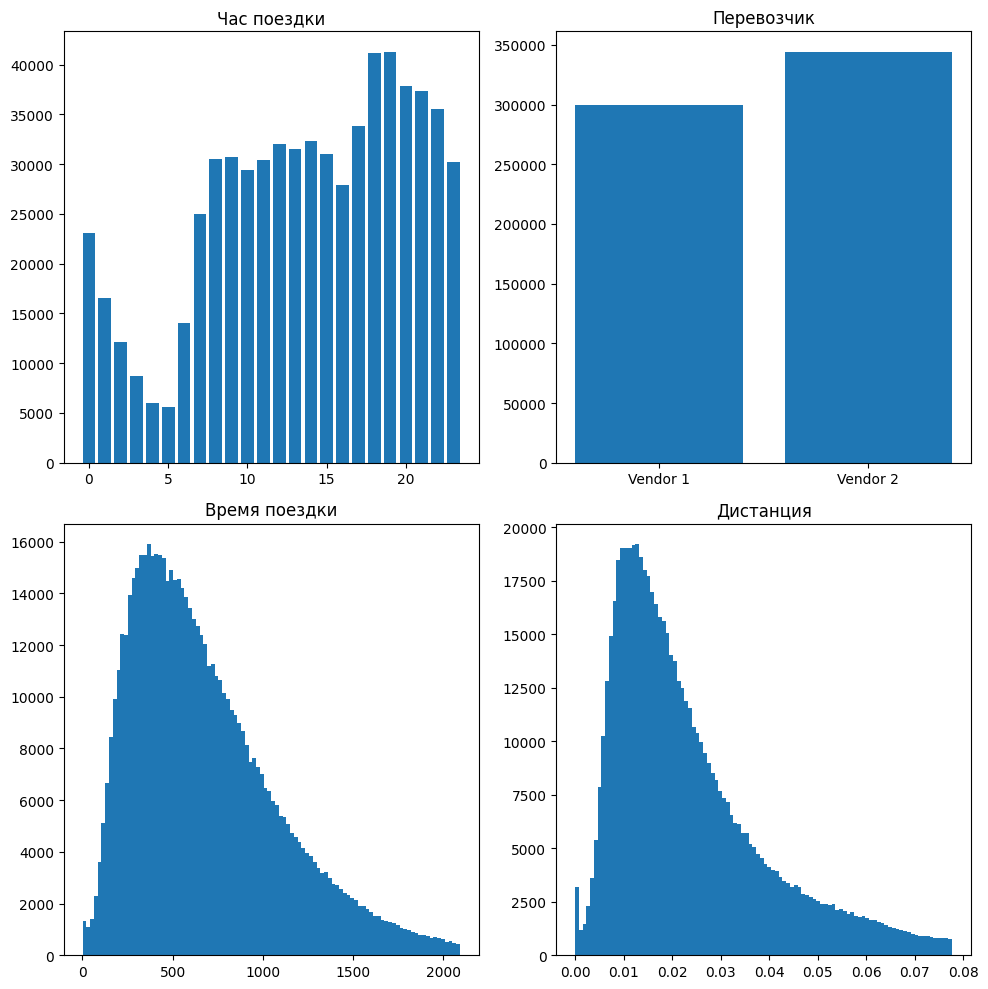

In [38]:
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(10, 10))

hours = data_filtered['trip_hour'].value_counts().sort_index()
axs[0][0].bar(hours.index, hours.values)
axs[0][0].set_title('Час поездки')

axs[0][1].bar([1, 2], data_filtered['vendor_id'].value_counts().sort_index().values)
axs[0][1].set_title('Перевозчик')
axs[0][1].set_xticks([1, 2], ['Vendor 1', 'Vendor 2'])

axs[1][0].hist(data_filtered['trip_duration'], bins=100)
axs[1][0].set_title('Время поездки')

axs[1][1].hist(data_filtered['distance'], bins=100)
axs[1][1].set_title('Дистанция')
plt.show()

In [39]:
data_filtered = pd.get_dummies(data_filtered, columns=['vendor_id'])
data_filtered['vendor_id_1'] = data_filtered['vendor_id_1'].astype(int)
data_filtered['vendor_id_2'] = data_filtered['vendor_id_2'].astype(int)
data_with_other_featches = data_filtered.drop(['distance'], axis=1)
data_filtered = data_filtered.drop(['pickup_datetime', 'dropoff_datetime'], axis=1)
data_filtered

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,Monday,February,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,Friday,March,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,Sunday,February,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,Tuesday,January,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,Wednesday,February,6,0.043264,848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,-73.965919,40.789780,-73.952637,40.789181,Saturday,May,13,0.013296,296,0,1
729318,1,-73.996666,40.737434,-74.001320,40.731911,Monday,February,0,0.007223,315,1,0
729319,1,-73.997849,40.761696,-74.001488,40.741207,Friday,April,18,0.020809,673,1,0
729320,1,-74.006706,40.708244,-74.013550,40.713814,Sunday,June,9,0.008823,447,1,0


## Сравнение графиков с выбросами и без

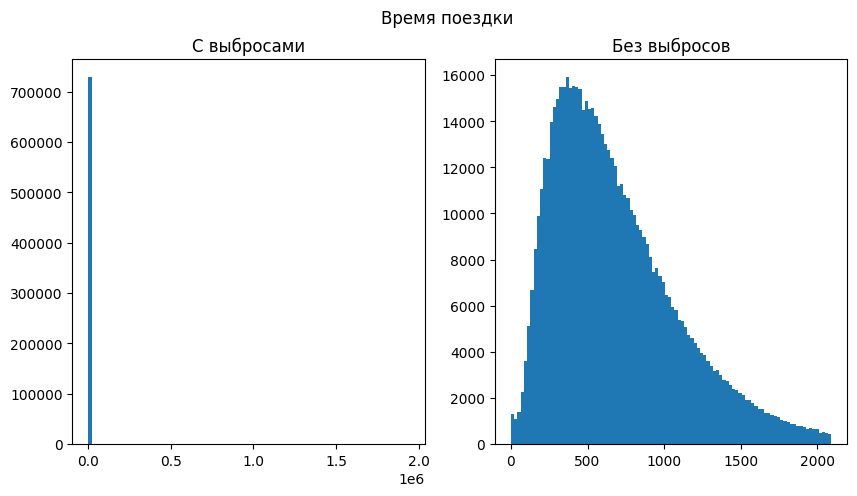

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Время поездки')
axs[0].hist(data['trip_duration'], bins=100)
axs[0].set_title('С выбросами')

axs[1].hist(data_filtered['trip_duration'], bins=100)
axs[1].set_title('Без выбросов')
plt.show()

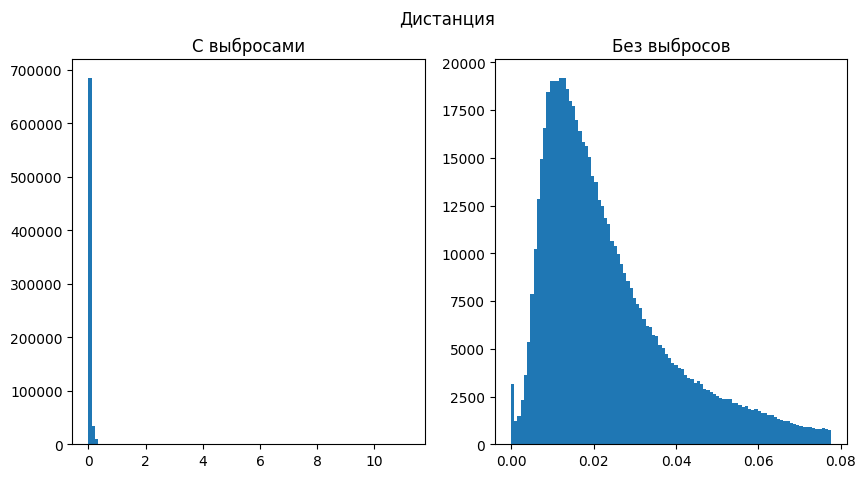

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Дистанция')

axs[0].hist(data['distance'], bins=100)
axs[0].set_title('С выбросами')

axs[1].hist(data_filtered['distance'], bins=100)
axs[1].set_title('Без выбросов')
plt.show()

# **Заключение**
- Максимальное время поездки уменьшилось с 700000 до 16000. Гистограмма имеет наклон вправо. Большинство значений находится в промежутке от 250 до 1000
- Максимальная дистанция снизилась с 680000 до 19000. Гистограмма также имеет накло вправо. Большинстов значений находтися в промежутке от 0.01 до 0.03

Также можно заметить явное схожество графиков распределения времени поездки и дистанции

## Факторы, влияющие на продолжительность поездки
В этом разделе будут проанализированы факторы, которые больше всего влияют на продолжительность поездки.

Среди таких факторов:
- Длина пройденного пути
- Время суток (час, в который соверешена поездка)
- Перевозчик
- День недели поездки
  
Для категориальных признаков использовались прямоугольные диаграммы, а для стальных - диаграммы рассеяния

## Выявление зависимости длительности поездки от дня недели

In [42]:
avg_on_day = pd.pivot_table(data=data_filtered, index='trip_day', values='trip_duration', aggfunc='mean')
avg_on_day.sort_values(ascending=False, by='trip_duration')

,trip_duration
trip_day,
Thursday,719.108885
Wednesday,715.521884
Friday,704.045348
Tuesday,699.626174
Saturday,666.671823
Monday,645.357190
Sunday,612.679625


## Выявление зависимости между первозчиком и временем перевозки

In [43]:
ven1_mean = data_filtered[data_filtered['vendor_id_1'] == 1]['trip_duration'].mean()
ven2_mean = data_filtered[data_filtered['vendor_id_2'] == 1]['trip_duration'].mean()
pd.DataFrame([ven1_mean, ven2_mean], ['Vendor 1', 'Vendor 2'])

,0
Vendor 1,681.016422
Vendor 2,682.709282


## Смотрим, в какой день недели чаще всего совершаются поездки

<BarContainer object of 7 artists>

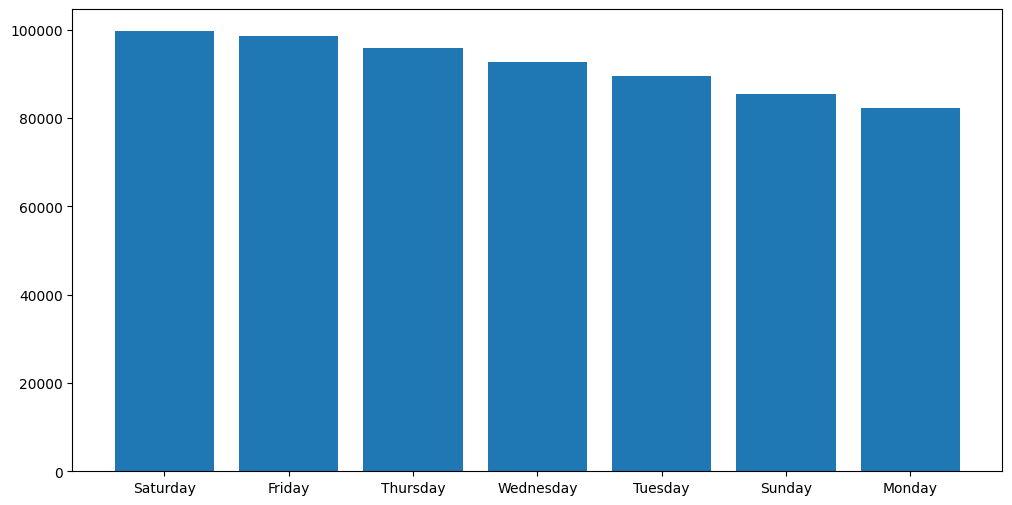

In [44]:
sorted_trip_day = data_filtered['trip_day'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(sorted_trip_day.index, sorted_trip_day.values)

## Зависимость длительности поездки от длины пути

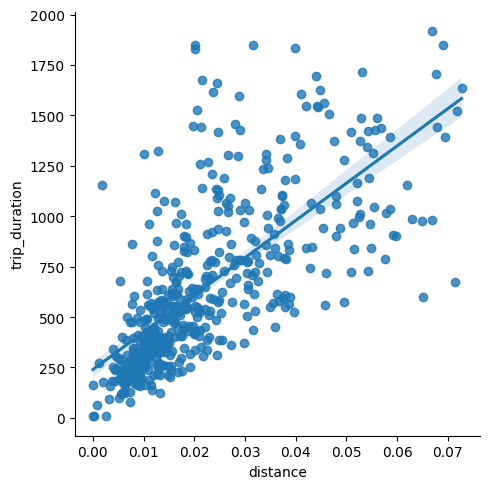

In [45]:
sns.lmplot(data_filtered[:500], x='distance', y='trip_duration')

## Строим heatmap

<Axes: >

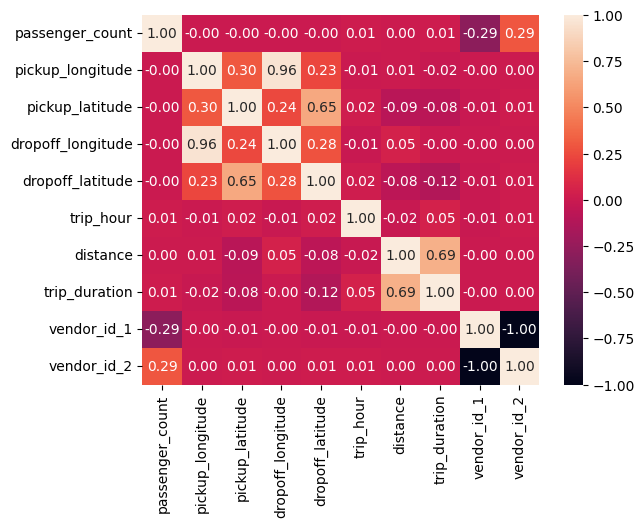

In [46]:
sns.heatmap(data_filtered.drop(['trip_day', 'trip_month'], axis=1).corr(), annot=True, fmt='.2f')

In [47]:
data_filtered.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,Monday,February,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,Friday,March,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,Sunday,February,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,Tuesday,January,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,Wednesday,February,6,0.043264,848,1,0


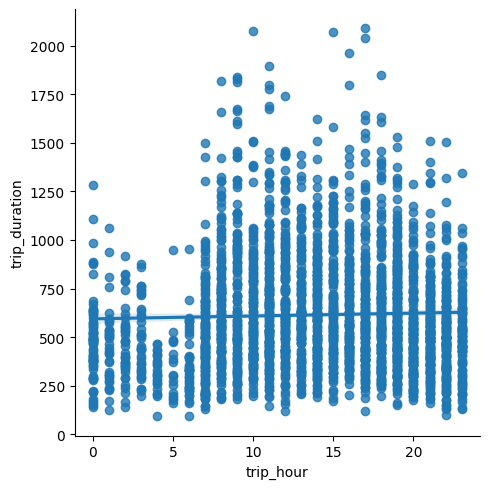

In [48]:
sns.lmplot(data_filtered[:5000].query("distance >= 0.01 and distance <= 0.03"), x='trip_hour', y='trip_duration')

Видим, что длительные поездки совершаются, в основном, после 07:00 часов утра. В период с 00:00 до 07:00 часов поездки короче. Это можно объяснить тем, что в 07:00 люди едут на работу, из-за чего дороги становятся непустыми. Ночью же наоборот, дороги пустые

In [49]:
data_filtered.groupby(by="trip_day")["trip_duration"].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
trip_day,,,,,,,,
Thursday,95798.0,719.108885,425.862050,2.0,388.0,634.0,967.0,2092.0
Wednesday,92647.0,715.521884,423.855904,1.0,390.0,629.0,962.0,2092.0
Friday,98526.0,704.045348,415.343262,2.0,384.0,621.0,943.0,2092.0
Tuesday,89614.0,699.626174,414.398776,1.0,380.0,614.0,939.0,2092.0
Saturday,99687.0,666.671823,394.366937,1.0,366.0,587.0,891.0,2092.0
Monday,82284.0,645.357190,383.023607,1.0,355.0,566.0,859.0,2092.0
Sunday,85400.0,612.679625,362.901000,1.0,338.0,540.0,814.0,2092.0


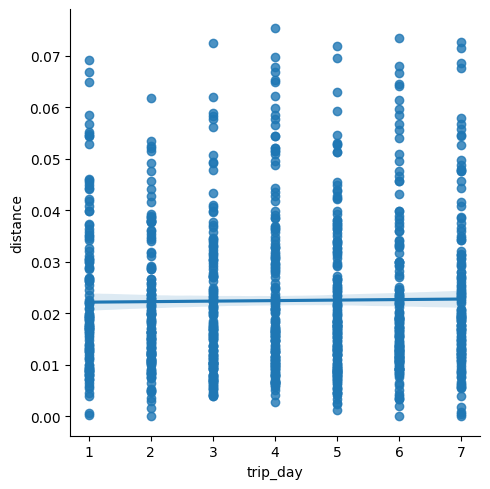

In [50]:
days = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
        'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data_filtered['trip_day'] = data_filtered['trip_day'].map(days)

sns.lmplot(data_filtered[:1000], x="trip_day", y="distance")

День недели незначительно влияет на длительность поездки

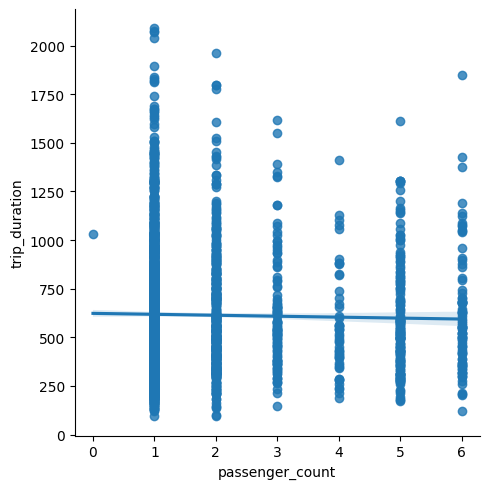

In [51]:
sns.lmplot(data_filtered[:5000].query("distance >= 0.01 and distance <= 0.03"), x='passenger_count', y='trip_duration')

In [52]:
data_filtered = data_filtered.query("passenger_count != 0")
data_filtered['passenger_count'].value_counts()

passenger_count
1    458699
2     91475
5     34144
3     26102
6     21207
4     12306
7         1
Name: count, dtype: int64

Пытаясь найти зависимость длительности поездки от числа пассажиров, находим выброс. Зависмости же не наблюдается

In [53]:
data_filtered.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,1,February,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,5,March,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,7,February,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,2,January,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,3,February,6,0.043264,848,1,0


In [54]:
months = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
data_filtered.loc[:, 'trip_month'] = data_filtered['trip_month'].map(months)
data_filtered = data_filtered.copy()
data_filtered['trip_month'] = pd.to_numeric(data_filtered['trip_month'])
data_filtered.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,1,2,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,5,3,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,7,2,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,2,1,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,3,2,6,0.043264,848,1,0


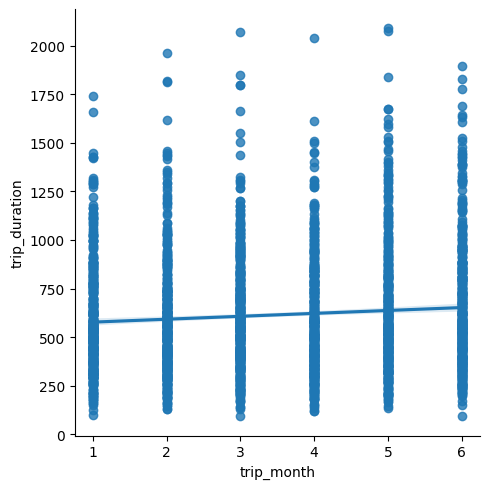

In [55]:
sns.lmplot(data_filtered[:5000].query("distance >= 0.01 and distance <= 0.03"), x='trip_month', y='trip_duration')

In [56]:
data_filtered[['trip_month', 'trip_duration']].corr()

,trip_month,trip_duration
trip_month,1.000000,0.049507
trip_duration,0.049507,1.000000


Видим, что длительность поездки почти не зависит от месяца

## Исследуем BoxPlot

<Axes: title={'center': 'trip_duration'}, xlabel='trip_month'>

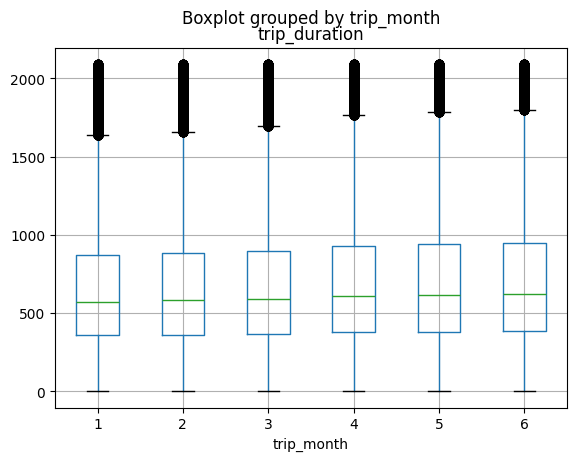

In [57]:
data_filtered.boxplot(by='trip_month', column=['trip_duration'])

<Axes: title={'center': 'trip_duration'}, xlabel='trip_hour'>

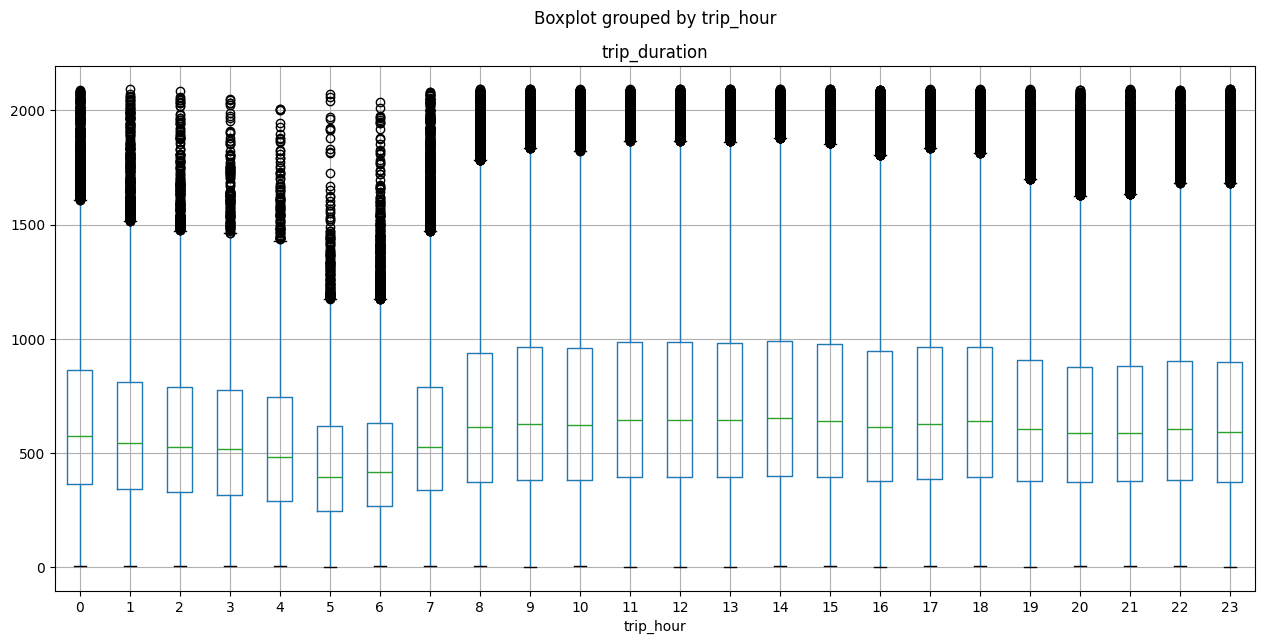

In [58]:
data_filtered.boxplot(by='trip_hour', column=['trip_duration'], figsize=(15, 7))

<Axes: title={'center': 'trip_duration'}, xlabel='passenger_count'>

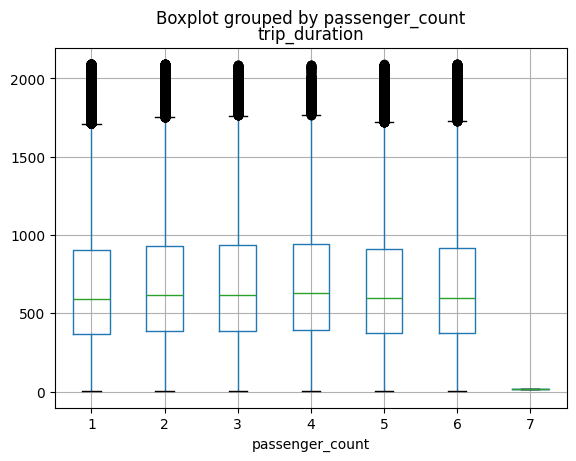

In [59]:
data_filtered.boxplot(by='passenger_count', column=['trip_duration'])

По этим графикам видно, что время суток влияет на продолжительность пути. Месяц же не сильно влиеят на продолжительность пути, как и число пассажиров. Также были замечены выбросы, связанные с числом пассажиров

In [60]:
data_filtered.query("passenger_count >= 7")

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
149473,7,-74.173668,40.737274,-74.17366,40.737297,2,6,10,0.000024,19,0,1


In [61]:
data_filtered = data_filtered.query("passenger_count < 7")

<Axes: title={'center': 'trip_duration'}, xlabel='passenger_count'>

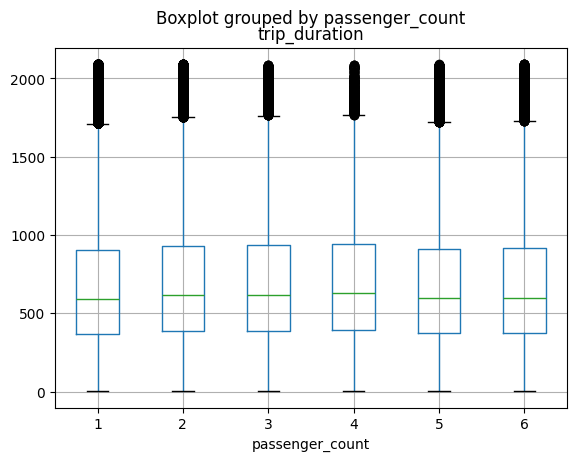

In [62]:
data_filtered.boxplot(by='passenger_count', column=['trip_duration'])

In [63]:
data_filtered['passenger_count'].value_counts()

passenger_count
1    458699
2     91475
5     34144
3     26102
6     21207
4     12306
Name: count, dtype: int64

In [64]:
data_filtered.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
count,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000,643933.000000
mean,1.657224,-73.979877,40.752844,-73.978053,40.753034,4.054895,3.504357,13.667076,0.023462,681.938616,0.465629,0.534371
std,1.309954,0.063566,0.024149,0.064021,0.026833,1.952761,1.679057,6.359938,0.015671,405.863752,0.498818,0.498818
min,1.000000,-121.933342,37.389381,-121.933304,37.389511,1.000000,1.000000,0.000000,0.000004,1.000000,0.000000,0.000000
25%,1.000000,-73.992203,40.738541,-73.991669,40.737892,2.000000,2.000000,9.000000,0.011895,371.000000,0.000000,0.000000
50%,1.000000,-73.982239,40.754200,-73.980820,40.754711,4.000000,3.000000,14.000000,0.019128,598.000000,0.000000,1.000000
75%,2.000000,-73.969841,40.767632,-73.966782,40.769142,6.000000,5.000000,19.000000,0.030817,912.000000,1.000000,1.000000
max,6.000000,-73.092278,41.256882,-73.092178,41.256889,7.000000,6.000000,23.000000,0.077693,2092.000000,1.000000,1.000000


In [65]:
data_filtered.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_day,trip_month,trip_hour,distance,trip_duration,vendor_id_1,vendor_id_2
0,1,-73.953918,40.778873,-73.963875,40.771164,1,2,16,0.012592,400,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,5,3,23,0.037371,1100,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,7,2,17,0.072712,1635,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,2,1,9,0.021473,1141,0,1
4,1,-74.017120,40.708469,-73.988182,40.740631,3,2,6,0.043264,848,1,0


# Общие выводы

1. В ходе анализа датасета были выявлены пустые значения признаков, после этого они были обработаны: пустые значения pickup_latitude заменены на среднее, а vendor_id - на моду
2. Были обработаны признаки с датами, добавлены новые столбцы. Также добавлен столбец с дистанцией поездки
3. После обработки выбросов стало видно, что графики длительности поездки и дистанции имеёт логнормальное распределение
4. Были преобразованы типы данных в датасете

Были выделены наиболее значимые признаки:
- Длина пройденного пути
- Время суток (час, в который соверешена поездка)
- Перевозчик
- День недели поездки
  
Для категориальных признаков использовались прямоугольные диаграммы, а для стальных - диаграммы рассеяния. Для нахождения корреляции между признаками использовалась HeatMap

- Было выяснено, что наиболее сильно длительность поездки зависит от длины пути.

- Длительные поездки совершаются, в основном, после 07:00 часов утра. В период с 00:00 до 07:00 часов поездки короче. Это можно объяснить тем, что в 07:00 люди едут на работу, из-за чего дороги становятся непустыми. Ночью же наоборот, дороги пустые.

- День недели поездки почти не влияет на длительность

- Перевозчик не влияет на длительность поездки

In [66]:
data_filtered.to_csv(r'D:\MachineLearning\data\trip_duration_processed.csv')

In [73]:
data_dummies = pd.get_dummies(data_filtered, columns=['trip_day', 'trip_month', 'trip_hour'], dtype=int)
data_dummies = data_dummies.drop(columns=['vendor_id_1', 'trip_day_1', 'trip_hour_1', 'trip_month_1'])

In [74]:
data_dummies.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,trip_duration,vendor_id_1,vendor_id_2,trip_day_1,...,trip_hour_14,trip_hour_15,trip_hour_16,trip_hour_17,trip_hour_18,trip_hour_19,trip_hour_20,trip_hour_21,trip_hour_22,trip_hour_23
0,1,-73.953918,40.778873,-73.963875,40.771164,0.012592,400,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,2,-73.988312,40.731743,-73.994751,40.694931,0.037371,1100,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,-73.997314,40.721458,-73.948029,40.774918,0.072712,1635,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,6,-73.961670,40.759720,-73.956779,40.780628,0.021473,1141,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-74.017120,40.708469,-73.988182,40.740631,0.043264,848,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data_dummies.to_csv(r'D:\MachineLearning\data\trip_duration_processed_dummies.csv')